In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [46]:
df = df[["Country", "EdLevel", "YearsCode", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,"Employed, full-time",NaN


In [47]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time;Independent contractor, fr...",194400.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     38071 non-null  object 
 1   EdLevel     38054 non-null  object 
 2   YearsCode   38001 non-null  object 
 3   Employment  38067 non-null  object 
 4   Salary      38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [49]:
df = df.dropna()
df.isnull().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [50]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31433 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    31433 non-null  object 
 1   EdLevel    31433 non-null  object 
 2   YearsCode  31433 non-null  object 
 3   Salary     31433 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [51]:
df['Country'].value_counts()

Country
United States of America                                7867
Germany                                                 2388
United Kingdom of Great Britain and Northern Ireland    2344
India                                                   1877
Canada                                                  1251
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64

In [52]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for country, count in categories.items():
        if count >= cutoff:
            categorical_map[country] = country  # Keep the country name as it is
        else:
            categorical_map[country] = 'Other'  # Group smaller categories as 'Other'
    return categorical_map

# Apply the mapping to the DataFrame
country_map = shorten_categories(df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(country_map)

# Display the updated country counts
print(df['Country'].value_counts())


Country
Other                                                   8659
United States of America                                7867
Germany                                                 2388
United Kingdom of Great Britain and Northern Ireland    2344
India                                                   1877
Canada                                                  1251
France                                                  1128
Brazil                                                  1015
Spain                                                    858
Netherlands                                              702
Australia                                                702
Italy                                                    668
Poland                                                   574
Sweden                                                   560
Russian Federation                                       424
Switzerland                                              416
Name: count, dty

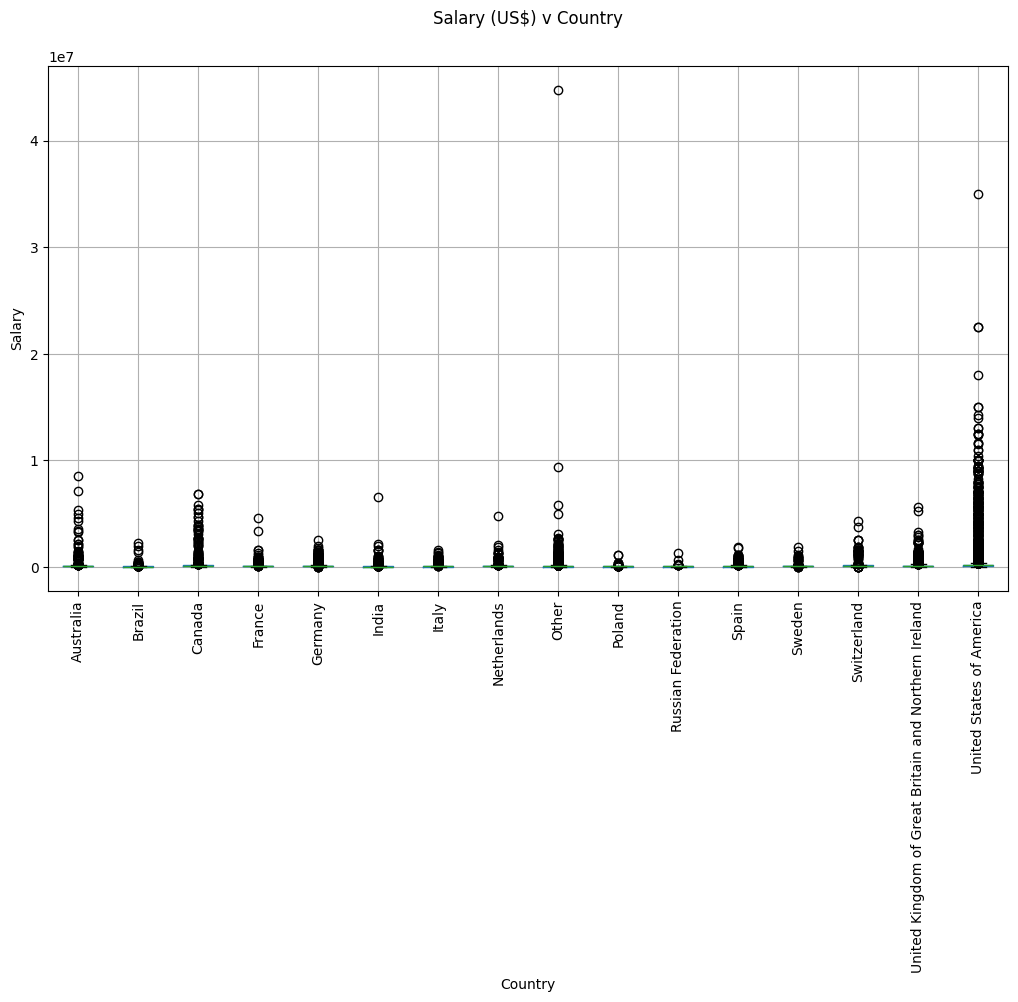

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [54]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

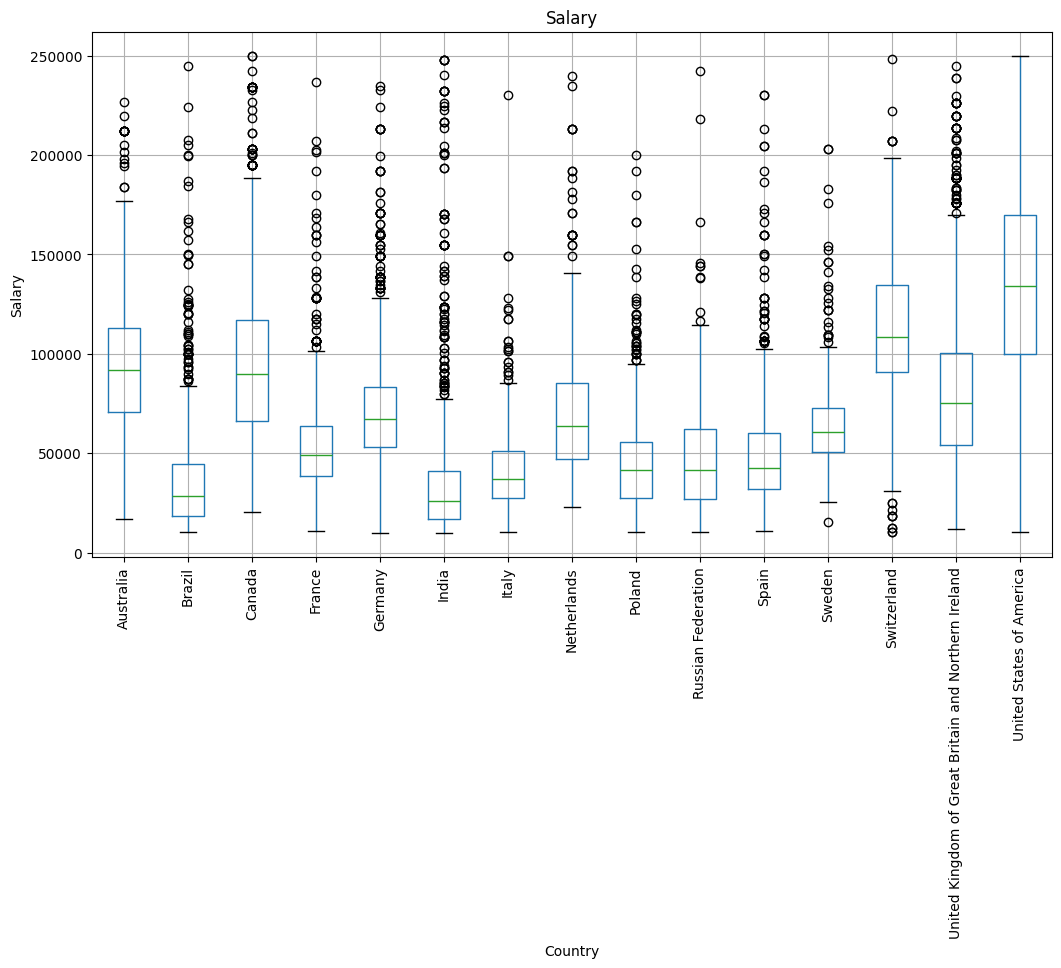

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [56]:
df['YearsCode'].unique()

array(['14', '6', '5', '12', '25', '16', '10', '20', '24', '40', '7',
       '15', '9', '4', '17', '18', '13', '30', '22', '8', '32', '26',
       '29', '11', '3', '28', '19', '23', '43', '48', '38', '21', '27',
       'Less than 1 year', '37', '31', '35', '2', '36', '42', '34', '46',
       '45', '1', '33', '41', '44', 'More than 50 years', '39', '47',
       '50', '49'], dtype=object)

In [57]:
def clean_experience(x):
    if x=='More than 50 years':
        return 50
    if x=='Less than 1 years':
        return 0.5
df['YearsCode'] = df['YearsCode'].apply(clean_experience)

In [58]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [59]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Professional degree'
    return 'Less than a Bachelors'
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [60]:
df['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Professional degree'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 1, 3])

In [62]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [63]:
x = df.drop('Salary', axis=1)
y = df['Salary']

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Fill missing values with median
x = x.fillna(x.mean())

# One-hot encode categorical variables
x = pd.get_dummies(x, drop_first=True)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize and train the model
Linear_reg = LinearRegression()
Linear_reg.fit(x_train, y_train)

# Make predictions
y_pred = Linear_reg.predict(x_test)

# Display predictions for verification
print("Predictions:", y_pred[:10])  # Show the first 10 predictions
print("Actual values:", y_test[:10].values)  # Show the first 10 actual values for comparison


Predictions: [117922.52691286 105816.34683764 111869.43687525 117132.84076029
  84762.73129746  75025.60967993 112659.12302781 112659.12302781
  70551.89194745 117922.52691286]
Actual values: [107500. 102385.  22615.  92000.  50875.  19200.  27641.  41461.  15480.
 103500.]


In [65]:
print("Target variable range:", y_train.min(), "to", y_train.max())


Target variable range: 10000.0 to 250000.0


In [66]:
y_pred = Linear_reg.predict(x)
y_pred

array([111079.75072269,  79499.32741242, 112659.12302781, ...,
       117922.52691286,  96868.91137267, 111079.75072269])

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [68]:
error

47292.607727514674

In [69]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [70]:
y_pred = dec_tree_reg.predict(x)

In [71]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$38,480.28


In [72]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [73]:
y_pred = random_forest_reg.predict(x)

In [74]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$38,480.91


In [75]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters =  {"max_depth": max_depth}
regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [76]:
regressor = gs.best_estimator_
regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$38,480.28


In [77]:
x

,Country,EdLevel,YearsCode
2,13,2,50.0
8,7,2,50.0
10,13,0,50.0
12,14,0,50.0
21,6,2,50.0
...,...,...,...
73113,14,2,50.0
73116,14,0,50.0
73119,14,0,50.0
73120,10,0,50.0


In [78]:
x = np.array([["United States", 'Master’s degree', 15]])
x

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [79]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoders
le_country = LabelEncoder()
le_education = LabelEncoder()

# Fit the LabelEncoders on the appropriate columns
le_country.fit(x[:, 0])  # Assuming x[:, 0] contains country data
le_education.fit(x[:, 1])  # Assuming x[:, 1] contains education level data

# Now transform the data
x[:, 0] = le_country.transform(x[:, 0])
x[:, 1] = le_education.transform(x[:, 1])

# Convert the data type of x to float
x = x.astype(float)


In [80]:
y_pred = regressor.predict(x)
y_pred

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([94660.22252011])

In [81]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education}
# Assuming 'model' is your trained model or pipeline
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [82]:
with open('saved_model.pkl', 'rb') as file:
    model = pickle.load(file)
regressor_loaded = model['model']
le_country = model["le_country"]
le_education = model["le_education"]

In [83]:
y_pred = regressor_loaded.predict(x)
y_pred

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([94660.22252011])

In [84]:
import sklearn
print(sklearn.__version__)

1.5.1
